# Week 3 Hamoye_Internship
## Supervised machinel learning(Classification)

In [3]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn


In [4]:
#importing the dataset from the website below
#df= pd.read_csv( 'https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae' ) 

In [5]:
df=pd.read_csv('ecology.csv')

C:\Users\Homet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head(3)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.0,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.0,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.0,4.262086e-01,3A


In [7]:
df.record.value_counts()

BiocapTotGHA    9024
EFConsPerCap    9024
EFConsTotGHA    9023
BiocapPerCap    9023
EFProdTotGHA    9023
EFProdPerCap    9023
AreaTotHA       9023
AreaPerCap      9023
Name: record, dtype: int64

In [8]:
#the target label is the QScore we are trying to predict.
#to check if we are dealing with a balanced dataset we run:
df.QScore.value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [9]:
df.isnull().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [10]:
#to drop rows with missing data we simply run a generic dropna
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [12]:
df.QScore.value_counts()

3A    51473
2A      224
1A       16
Name: QScore, dtype: int64

In [13]:
#converitng the dataset from a multiclass classification to a binary classification
#this is to simplify the classification and also fix the imbalanced data.
df[ 'QScore' ] = df[ 'QScore' ].replace([ '1A' ], '2A' ) 


In [14]:
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [15]:
#to further balance the dataset
df_2A = df[df.QScore== '2A' ]
df_3A = df[df.QScore== '3A' ].sample( 350 )
data_df = df_2A.append(df_3A) 

In [16]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True )
data_df.shape
data_df.QScore.value_counts() 

3A    350
2A    240
Name: QScore, dtype: int64

In [17]:
data_df = data_df.drop(columns=[ 'country_code' , 'country' , 'year' ]) 
X = data_df.drop(columns= 'QScore' )
y = data_df[ 'QScore' ] 


In [18]:
#record is a a categorical column that needs to be encoded for the model to  read it.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X.record = encoder.fit_transform(X.record)

In [31]:
#spliting the data into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [32]:
import imblearn
#the library imblearn is imported to make final corrections of bias caused by oversampling of one class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=[ 'record' ]))
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=x_train_balanced.drop(columns=[ 'record' ]).columns)
normalised_train_df[ 'record' ] = x_train_balanced[ 'record' ]
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test.drop(columns=[ 'record' ]))
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.drop(columns=[ 'record' ]).columns)
normalised_test_df[ 'record' ] = x_test[ 'record' ] 


#### Model development

In [33]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced) 


LogisticRegression()

In [34]:
print(log_reg.score(normalised_train_df,y_balanced))
print(log_reg.score(normalised_test_df,y_test))

0.5287356321839081
0.5337837837837838


#### Model Evaluation

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score




In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv= 5 , scoring= 'f1_macro' )
print(scores)
print(np.mean(scores))


[0.41883677 0.43978659 0.43263985 0.47609746 0.45663532]
0.44479919659552036


In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 5 )
kf.split(normalised_train_df)
f1_scores = []
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
    x_train, x_test = normalised_train_df.iloc[train_index],normalised_train_df.iloc[test_index]
    y_train, y_test = y_balanced[train_index],y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
 #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),pos_label= '2A' )* 100 ) 

In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1 )
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index],np.array(normalised_train_df)[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
     #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label= '2A' )) 

In [27]:
f1_scores

[0.4077669902912621,
 0.6666666666666665,
 0.6571428571428571,
 0.6620689655172414,
 0.5573770491803278]

In [28]:
#leave one out
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo,
 scoring= 'f1_macro' )
average_score = scores.mean() * 100 

In [29]:
average_score

41.7624521072797

In [35]:
#Confusion Matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[ '2A' , '3A' ])
cnf_mat

array([[43, 16],
       [53, 36]], dtype=int64)

In [36]:
#Accuracy
accuracy = accuracy_score(y_true=yK_test, y_pred=new_predictions)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 )) 


Accuracy: 53.0


In [37]:
#Recall
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 )) 

Recall: 73.0


In [38]:
#precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 45.0


In [39]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'F1: {}' .format(round(f1* 100 ), 2 )) 

F1: 55.0


In [40]:
from sklearn.metrics import classification_report

In [41]:
#to get a summary of the whole report 
print(classification_report(y_test, new_predictions,
 target_names=["2A", "3A"]))


              precision    recall  f1-score   support

          2A       0.45      0.73      0.55        59
          3A       0.69      0.40      0.51        89

    accuracy                           0.53       148
   macro avg       0.57      0.57      0.53       148
weighted avg       0.59      0.53      0.53       148



Evaluating a model accuracy could get tricky as it all depends on the "business metiric" or what the end goal is.
sometimes a business goal could deal  with having more false positives than a high false negatives i.e they are targeting  a highre recall value. Setting the model parameters to include a high recall or precision is called setting an <b> Operating Point</b>.
 most classifiers provide a decision_function or a predict_proba method to
assess degrees of certainty about predictions. Making predictions can be seen as
thresholding the output of decision_function or predict_proba at a certain fixed
point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.Increasing or decreasing the values theat we set as threshold determines if we want a high recall or precision curve.
There is a trade of between the precison and recall value as it is impossible to have very high values of both and so picking a value that still balances those metrics become tricky. This is where the precision recall curve comes in handy.


In [42]:
#lets convert our target label to binary values
y_test_binary=pd.get_dummies(y_test)

In [43]:
y_test_binary

,2A,3A
225,1,0
14,1,0
85,0,1
418,1,0
132,0,1
...,...,...
357,0,1
0,0,1
181,0,1
71,1,0


In [44]:
y_test_binary.drop('2A',inplace=True,axis=1)

In [45]:
y_test_binary

,3A
225,0
14,0
85,1
418,0
132,1
...,...
357,1
0,1
181,1
71,0


In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
 y_test_binary, log_reg.predict_proba(normalised_test_df)[:,1])


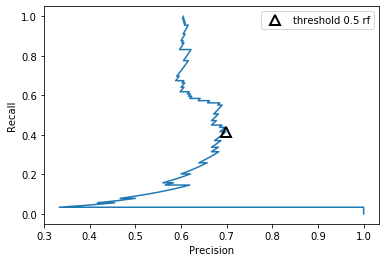

In [47]:
plt.plot(precision, recall)
close_default= np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default], recall[close_default], '^', c='k',
 markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Each point along the PRcurve represents a possible threshold of the predict_proba esitmator. from the curve we can see that a precison of 0.7 will correspond to a recall value of about 0.2. The black traingle marks the point that corresponds to a thresh‐
old of 0.5, the default threshold for predcit_proba. This point is the trade-off that
is chosen when calling the predict method. Values located at the upper right corner are usuall values that correspond to high precision and recall. The curve starts at the upper left corner with a corresponding recall value of 1.0 which is the highes and this implies a low threshold value at that point and thus classifies everything as the positive class. Increasing the threshold i.e choosing a higher pobability value before a data point can be classified as positive we see that the curve moves to the right implying a higher prediction of  True Positive in other words precision level becomes high while the recall value drops.Raising the threshold more and more, we get to a situation where most of the points classified as being positive are true positives, leading
to a very high precision but lower recall. The more the model keeps recall high as
precision goes up, the better.

### Average Precision SCORE

One way to summarize the precision recall curve i s by computing the are under the curve which is called the average precision.The average precision score function can be used to calculae this.

In [52]:
from sklearn.metrics import average_precision_score
ap = average_precision_score(y_test_binary, log_reg.predict_proba(normalised_test_df)[:, 1])
ap


0.6351231176074681

### ROC  CURVE

The Reciever Operational Character curve is another metric for evaluating the performnce of a classificatin model. It is a plot of the <strong>RECALL</strong> versus the <strong> False Postive RATE</strong> the FPR is given by the formula <strong>FP/FP+TN</strong>

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_binary, log_reg.predict_proba(normalised_test_df)[:, 1])

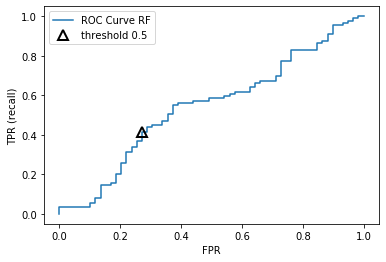

In [60]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
default = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[default], tpr[default], '^', markersize=10,
label="threshold 0.5 ", fillstyle="none", c='k', mew=2)
plt.legend(loc="best")

A quick glance at the curve we can notice something different compared to the precision recall curve. In the roc curve optimum values will be found at the upper left corner where we have a higher recall value and a low false positive rate unlike the preicsion recall curve where the optimum values would be located at the upper right corner. From the above curve the default threshold value gives us a recall value slightly greater than 0.4 and FPR of about 0.25. Depening on the business goal the threshold can be changed and this would lead to either a higher recall and subsequently higher FPR or a lower recall value and therefore a lower FPR.

### Area Under the Curve (AUC)

The AUC value gives a summary of the ruc curve. The AUC
it can be interpreted as evaluating the ranking of positive samples. It’s equivalent to the
probability that a randomly picked point of the positive class will have a higher score
according to the classifier than a randomly picked point from the negative class. So, a
perfect AUC of 1 means that all positive points have a higher score than all negative
points. This can also be simply put as the certainty at which a data instance is classified as positve is  with a certainty of 1 for all positive class

In [61]:
from sklearn.metrics import roc_auc_score
log_auc = roc_auc_score(y_test_binary, log_reg.predict_proba(normalised_test_df)[:, 1])
print("AUC for Random Forest: {:.3f}".format(log_auc))

AUC for Random Forest: 0.542


### Notebook by Adediwura Boluro_Ajayi
linkedin:<a href="https://linkedin.com/in/adediwura"> connect on linkedin</a>